# 為替予測 サンプルコード

#### ※わからないメソッドや関数などがある場合はご自身でぜひ調べてみてください！

## 1. データをダウンロードしよう
■為替の価格予測分析
https://kino-code.com/df-finance-binary-classification/

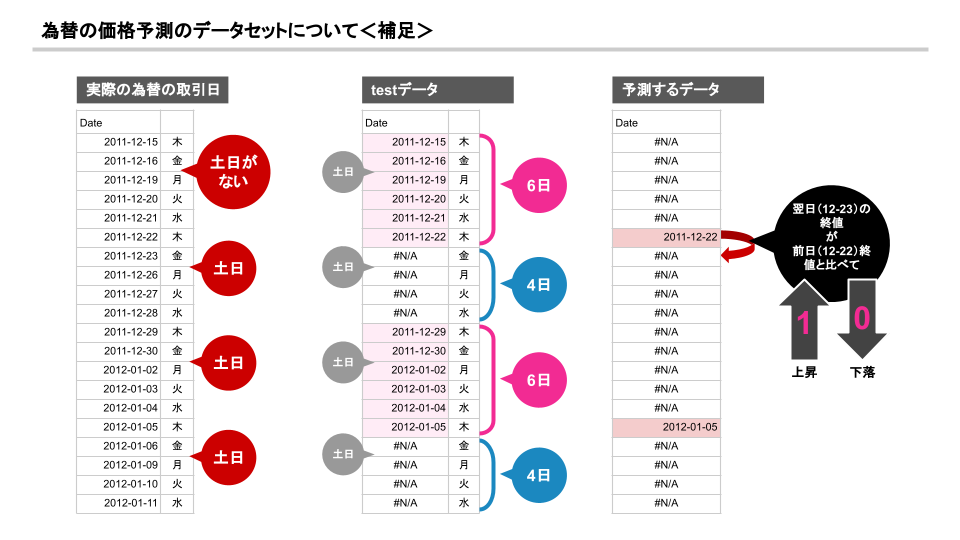

## 2. データを読み込もう

In [36]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#図をアウトプット行に出力するため。
%matplotlib inline

#警告を表示させない設定
import warnings
warnings.simplefilter('ignore')

In [37]:
# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/train_finance.csv'
path_test=working_directory+'/test_finance.csv'
# path_test=working_directory+'/test_finance_last10elminate.csv'
# path_latest=working_directory+'/test_latest.csv'
path_submit=working_directory+'/submit_finance.csv'

In [38]:
#それぞれのデータの読み込み。（indexにDateを使用、parse_dates:インデックスの列をdatetime型にする）
df_train = pd.read_csv(path_train,index_col="Date",parse_dates=True)
df_test = pd.read_csv(path_test,index_col="Date",parse_dates=True)
df_submit = pd.read_csv(path_submit)

## 3. データの概要を確認しよう

In [39]:
#学習するデータの中身を確認する。
df_train.head(3)

,High,Low,Open,Close
Date,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377
2003-12-02,112.008532,110.500532,110.639316,111.823016
2003-12-03,112.202814,111.712284,111.832477,112.137524


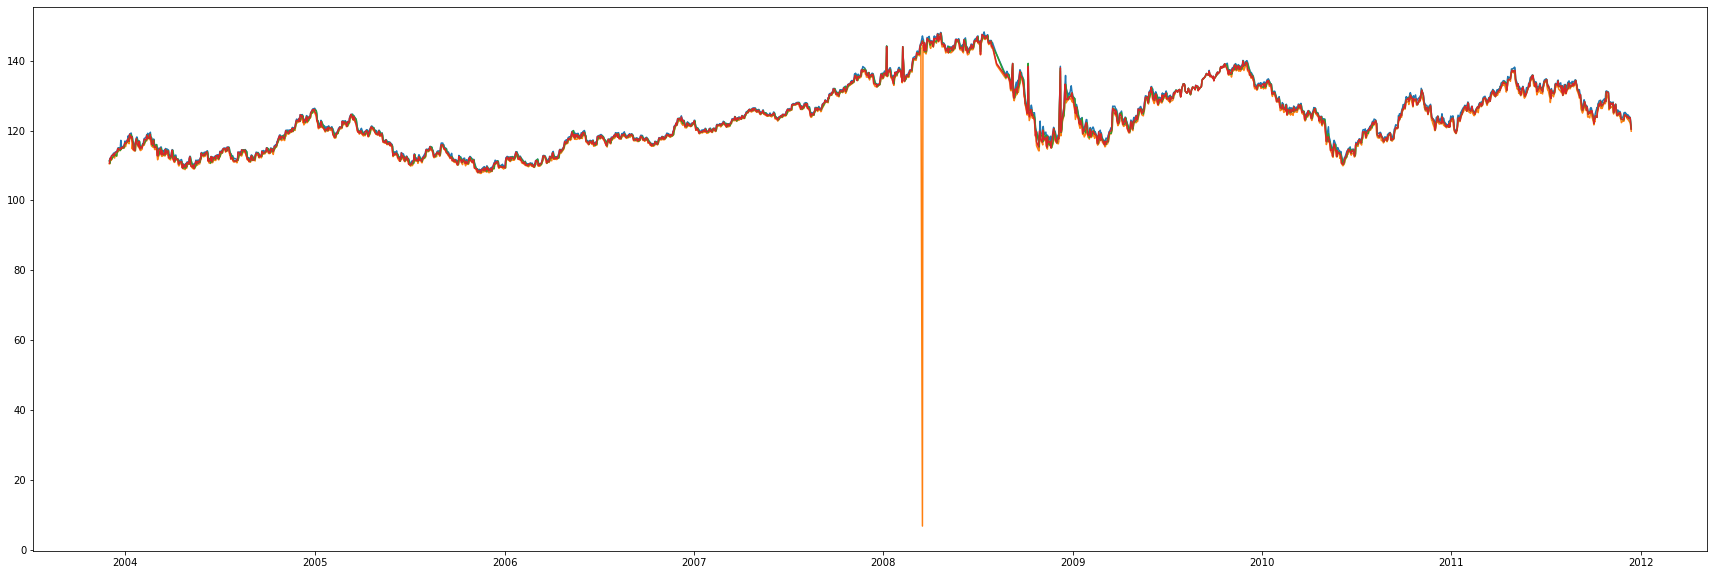

In [40]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_train)

In [41]:
#予測するデータを確認する。
df_test.head(3)

,High,Low,Open,Close
Date,,,,
2011-12-15,120.703596,119.907182,120.132990,120.139231
2011-12-16,121.027367,120.314249,120.527453,120.524311
2011-12-19,120.629617,120.111145,120.582444,120.591872


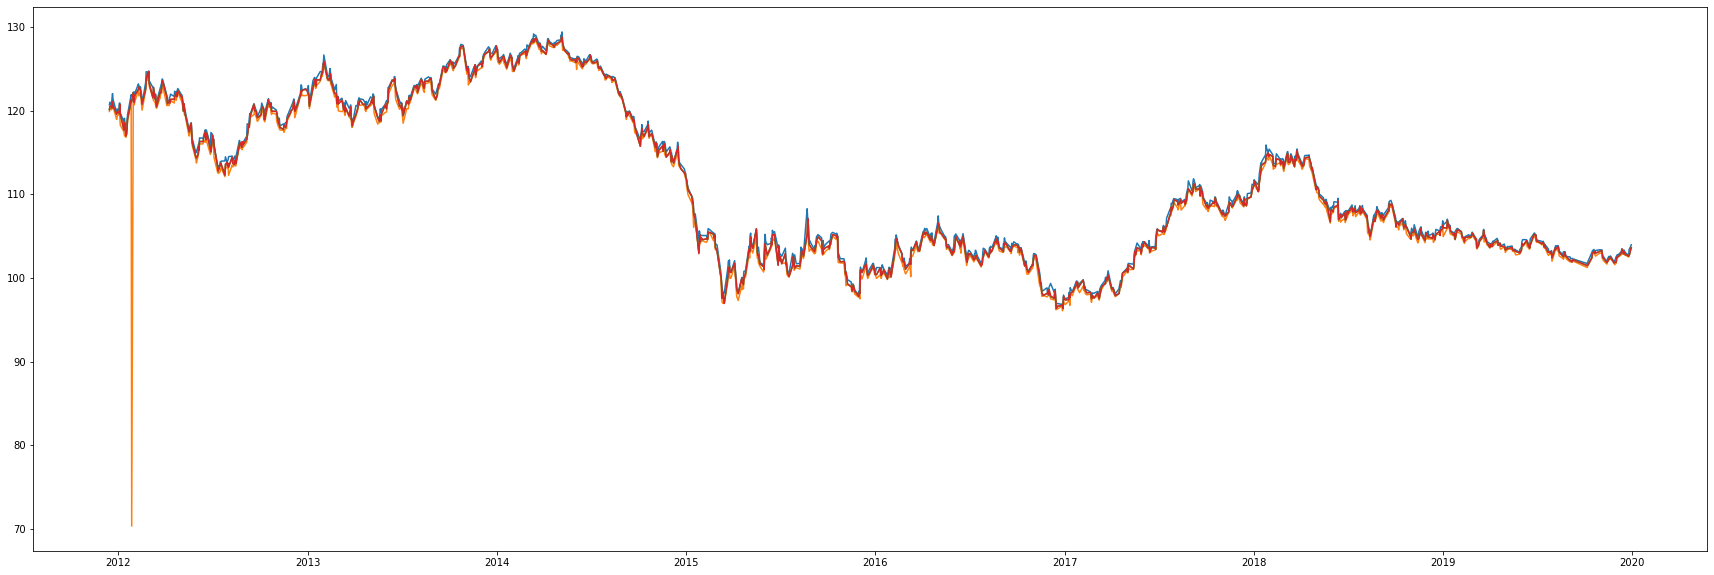

In [42]:
fig = plt.subplots(figsize=(30,10))
plt.plot(df_test)

In [43]:
#提出するデータの内容を確認する。
df_submit.head(5)

,Date
0,2011-12-22
1,2012-01-05
2,2012-01-19
3,2012-02-02
4,2012-02-16


## 4. 目的変数を作成しよう

In [44]:
#翌日始値と当日終値の差のカラム（shift）を作成
df_train["shift"] = df_train["Open"].shift(-1) - df_train["Close"]

In [45]:
#翌日始値が当日終値よりも高ければ「1」、低ければ「0」のカラム（y）を作成する。（目的変数）
def p_day(x):
    if x < 0:
        return 0
    else:
        return 1
df_train['y'] = df_train['shift'].apply(p_day)

In [46]:
df_train.head(10)

,High,Low,Open,Close,shift,y
Date,,,,,,
2003-12-01,111.370639,110.482062,111.314347,110.676377,-0.037061,0
2003-12-02,112.008532,110.500532,110.639316,111.823016,0.009461,1
2003-12-03,112.202814,111.712284,111.832477,112.137524,-0.027181,0
2003-12-04,112.332259,111.406851,112.110343,111.748717,-0.026994,0
2003-12-05,112.766375,111.609834,111.721723,112.729259,-0.175559,0
2003-12-08,113.220483,112.425105,112.553700,113.035088,0.009660,1
2003-12-09,113.562415,112.831025,113.044748,113.312017,-0.008325,0
2003-12-10,113.460736,112.498941,113.303692,112.766375,0.000000,1
2003-12-11,113.173376,112.137524,112.766375,113.072392,0.027644,1


## 5. 色々な特徴量等を作成してみよう

## 6. モデリングをし、汎化性能（モデルの性能）を確認してみよう

In [63]:
#学習に使用しないデータは削除し、学習データと正解データに分ける。
#学習データとラベルに分ける
drop = ['shift',"y"]
train_X = df_train.drop(columns=drop,axis=1) 
train_y = df_train['y']

In [64]:
# 中身の確認
print(f'学習データ(train_X)\n{train_X}\n')
print(f'正解データ(train_y)\n{train_y}\n')

学習データ(train_X)
                  High         Low        Open       Close
Date                                                      
2003-12-01  111.370639  110.482062  111.314347  110.676377
2003-12-02  112.008532  110.500532  110.639316  111.823016
2003-12-03  112.202814  111.712284  111.832477  112.137524
2003-12-04  112.332259  111.406851  112.110343  111.748717
2003-12-05  112.766375  111.609834  111.721723  112.729259
...                ...         ...         ...         ...
2011-12-08  124.476855  123.126484  123.959751  123.984661
2011-12-09  124.227770  122.895824  123.445260  123.445260
2011-12-12  123.745819  122.202555  123.681290  123.687906
2011-12-13  122.393352  121.174807  121.782641  121.832361
2011-12-14  120.796608  119.824855  120.508620  120.427021

[2074 rows x 4 columns]

正解データ(train_y)
Date
2003-12-01    0
2003-12-02    1
2003-12-03    0
2003-12-04    0
2003-12-05    0
             ..
2011-12-08    0
2011-12-09    1
2011-12-12    0
2011-12-13    0
2011-12-14  

In [49]:
#学習データを分割するライブラリをインポートする。
from sklearn.model_selection import train_test_split

In [65]:
#学習データと正解データをそれぞれ分割（7：3）する。
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y,test_size=0.3,random_state=0)

In [66]:
# 中身の確認
print(f'学習データ(X_train)\n{X_train}\n')
print(f'学習データ(X_test)\n{X_test}\n')
print(f'正解データ(y_train)\n{y_train}\n')
print(f'正解データ(y_test)\n{y_test}\n')

学習データ(X_train)
                  High         Low        Open       Close
Date                                                      
2010-09-20  121.627305  120.799751  120.873950  120.869209
2010-06-29  113.777538  112.552322  112.733394  113.127714
2010-11-08  130.250508  128.518640  130.202828  130.201008
2009-01-27  123.164185  121.461208  121.993044  122.247776
2004-09-01  112.859938  112.341808  112.776001  112.600277
...                ...         ...         ...         ...
2007-11-20  137.352445  135.402179  135.678237  137.205743
2010-08-22  117.739908  117.005662  117.575276  117.567811
2006-11-06  117.789374  117.415586  117.650050  117.711436
2007-02-14  121.619311  120.508620  120.546298  121.544207
2010-05-04  120.203242  118.365152  119.953825  118.538076

[1451 rows x 4 columns]

学習データ(X_test)
                  High         Low        Open       Close
Date                                                      
2008-12-29  132.829778  128.806761  130.480164  129.861017
2

In [51]:
#必要なライブラリのインポート
from sklearn.tree import DecisionTreeClassifier
#決定木モデルの作成（max_depthは決定木の木の高さ）
dtc = DecisionTreeClassifier(random_state=1,max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [52]:
#作成したモデルを使用し予測。
train_pred = dtc.predict(X_train)
test_pred = dtc.predict(X_test)

In [53]:
#必要なライブラリのインポート（評価方法はaccuracy）
from sklearn.metrics import accuracy_score

#今回作成したモデルの汎化性能を確認する。
print("train:",accuracy_score(y_train, train_pred))
print("test",accuracy_score(y_test, test_pred))

train: 0.585802894555479
test 0.565008025682183


## 6. 予測結果を投稿しよう
https://kino-ds.com/finance_form

In [54]:
#作成したモデルを使用して、df_testデータ(今回予測するデータ)を予測する。
test_X = df_test
dtc.predict(test_X)

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
#ndarray型から行列に変換する。
y_submit = pd.Series(dtc.predict(test_X))
y_submit

0       1
1       1
2       1
3       1
4       1
       ..
1241    0
1242    0
1243    0
1244    0
1245    0
Length: 1246, dtype: int64

In [56]:
#6番目毎のデータ結果のみ取り出す。
y_submit = y_submit[5::6].reset_index(drop=True)
y_submit.shape

(207,)

In [57]:
df_submit

,Date
0,2011-12-22
1,2012-01-05
2,2012-01-19
3,2012-02-02
4,2012-02-16
...,...
202,2019-10-23
203,2019-11-07
204,2019-11-21
205,2019-12-05


In [58]:
df_submit[1] = y_submit
df_submit

,Date,1
0,2011-12-22,1
1,2012-01-05,1
2,2012-01-19,1
3,2012-02-02,1
4,2012-02-16,1
...,...,...
202,2019-10-23,0
203,2019-11-07,0
204,2019-11-21,0
205,2019-12-05,0


In [59]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = df_submit.set_index("Date") #indexにDateを指定する。
df_submit = df_submit.rename(columns={1: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,y
Date,
2011-12-22,1
2012-01-05,1
2012-01-19,1
2012-02-02,1
2012-02-16,1
...,...
2019-10-23,0
2019-11-07,0
2019-11-21,0


# おつかれさまでした〜〜(๑>◡<๑)